In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn.preprocessing import StandardScaler

In [7]:
names = ["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "origin", "car name"] 
df = pd.read_csv("auto-mpg.csv", names=names, index_col=8)

In [8]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86.0,2790.0,15.6,82,1
vw pickup,44.0,4,97.0,52.0,2130.0,24.6,82,2
dodge rampage,32.0,4,135.0,84.0,2295.0,11.6,82,1


In [9]:
y = df.mpg.values

In [22]:
XX = df.values
country = np.array([XX[:, -1] == 1, XX[:, -1] == 2]).T
country.shape
X = StandardScaler().fit_transform(np.hstack([XX[:, 1:-1], country]))

In [38]:
model = Sequential([Input(8), Dense(1, activation="linear")])
model.compile(loss="mse", optimizer="sgd", metrics=["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.fit(X, y, epochs=100, validation_split=0.2)

Train on 313 samples, validate on 79 samples
Epoch 1/100
313/313 [==============================] - 0s 1ms/sample - loss: 429.9652 - accuracy: 0.0000e+00 - val_loss: 824.1875 - val_accuracy: 0.0000e+00
Epoch 2/100
313/313 [==============================] - 0s 66us/sample - loss: 286.3085 - accuracy: 0.0000e+00 - val_loss: 655.1795 - val_accuracy: 0.0000e+00
Epoch 3/100
313/313 [==============================] - 0s 76us/sample - loss: 195.6491 - accuracy: 0.0000e+00 - val_loss: 536.4268 - val_accuracy: 0.0000e+00
Epoch 4/100
313/313 [==============================] - 0s 81us/sample - loss: 137.0197 - accuracy: 0.0000e+00 - val_loss: 439.7555 - val_accuracy: 0.0000e+00
Epoch 5/100
313/313 [==============================] - 0s 84us/sample - loss: 98.4077 - accuracy: 0.0000e+00 - val_loss: 371.0615 - val_accuracy: 0.0000e+00
Epoch 6/100
313/313 [==============================] - 0s 73us/sample - loss: 72.5081 - accuracy: 0.0000e+00 - val_loss: 306.7753 - val_accuracy: 0.0000e+00
Epoch 7/10

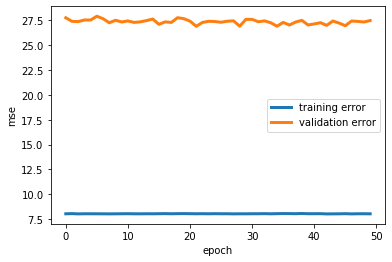

In [37]:
from matplotlib import pyplot as plt

loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
plt.plot(loss[50:], lw=3, label="training error")
plt.plot(val_loss[50:], lw=3, label="validation error")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.legend()

In [60]:
model = Sequential([Input(8),
                    Dense(8, activation="relu"),
                    Dense(8, activation="relu"),
                    Dense(1, "linear")])
model.compile(loss="mse", optimizer=sgd(learning_rate=0.005))
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_22 (Dense)             (None, 8)                 72        
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [61]:
model.fit(X, y, epochs=100, validation_split=0.2, verbose=0)

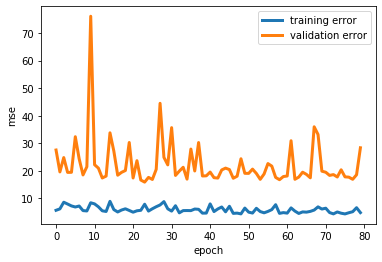

In [62]:
loss = model.history.history["loss"]
val_loss = model.history.history["val_loss"]
plt.plot(loss[20:], lw=3, label="training error")
plt.plot(val_loss[20:], lw=3, label="validation error")
plt.xlabel("epoch")
plt.ylabel("mse")
plt.legend()

In [63]:
# Can we optimize the number of units in the hidden layers?

In [69]:
from sklearn.model_selection import cross_val_score, train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2)



TypeError: Cannot clone object '<tensorflow.python.keras.engine.sequential.Sequential object at 0x14bed5f90>' (type <class 'tensorflow.python.keras.engine.sequential.Sequential'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [74]:
from sklearn.base import BaseEstimator, RegressorMixin

# from tensorflow model to sklearn model
# sklearn "wrapper" for a tensorflow model

class NN(BaseEstimator, RegressorMixin):
    def __init__(self, n_units):
        self.n_units = n_units
        self.model = Sequential([Input(8),
                            Dense(n_units, activation="relu"),
                            Dense(n_units, activation="relu"),
                            Dense(1, activation="linear")])
        self.model.compile(loss="mse", optimizer="rmsprop", metrics=["mse"])
    
    def fit(self, X, y, **kwargs):
        self.model.fit(X, y, **kwargs)
    
    def predict(self, X, **kwargs):
        return self.model.predict(X, **kwargs)

In [75]:
scores = []
for n_units in [2, 4, 8, 16, 32, 64, 128, 256]:
    model = NN(n_units=n_units)
    score = cross_val_score(model, X, y,
                            cv=5,
                            scoring="neg_mean_squared_error",
                            fit_params={"epochs": 100, "verbose": 0}).mean()
    scores.append(score)

In [76]:
scores

[-537.0103293871174,
 -128.95566270525345,
 -15.576639515125922,
 -9.225998041654028,
 -8.700640598775996,
 -8.758663093377201,
 -8.643958192890704,
 -8.76317350648048]